In [92]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

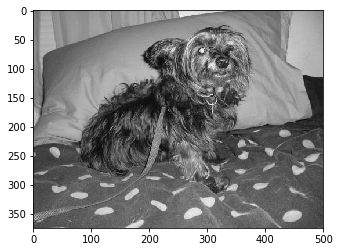

In [93]:
DATADIR = "C:/Users/Gaurav/Gaurav's Files/Study/Data Science/ISB Business Analytics/CBA10/Classes/Capstone/Model/Data/PetImages"
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap ="gray")
        plt.show()
        break
    break
    

In [15]:
print(img_array.shape)

(375, 500)


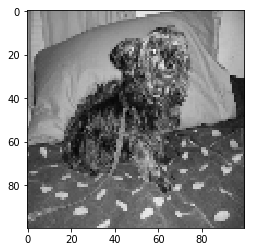

In [34]:
IMG_SIZE  = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= "gray")
plt.show()

In [35]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [36]:
print(len(training_data))

24946


In [37]:
import random
random.shuffle(training_data)

In [39]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
0
0
1
0
0
0


In [41]:
X=[]
y=[]

In [42]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [43]:
import pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [44]:
pickle_in = open("X.pickle", "rb")
X= pickle.load(pickle_in)

In [45]:
X[1]

array([[[147],
        [149],
        [148],
        ...,
        [220],
        [162],
        [166]],

       [[151],
        [148],
        [148],
        ...,
        [203],
        [159],
        [162]],

       [[147],
        [149],
        [151],
        ...,
        [227],
        [178],
        [157]],

       ...,

       [[ 91],
        [ 96],
        [ 90],
        ...,
        [ 58],
        [ 61],
        [ 63]],

       [[ 97],
        [100],
        [ 82],
        ...,
        [ 45],
        [ 59],
        [ 65]],

       [[ 82],
        [ 80],
        [ 90],
        ...,
        [ 62],
        [ 59],
        [ 66]]], dtype=uint8)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation, Conv2D, MaxPooling2D

import pickle
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

C:\Users\Gaurav\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
X= X/255.0
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape =X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])
model.fit(X,y, epochs = 3, batch_size = 32, validation_split = 0.1)

Instructions for updating:
Colocations handled automatically by placer.
Train on 22451 samples, validate on 2495 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
22451/22451 [==============================] - 331s 15ms/sample - loss: 0.6377 - acc: 0.6353 - val_loss: 0.5871 - val_acc: 0.6950
Epoch 2/3
22451/22451 [==============================] - 343s 15ms/sample - loss: 0.5403 - acc: 0.7308 - val_loss: 0.5533 - val_acc: 0.7234
Epoch 3/3
22451/22451 [==============================] - 343s 15ms/sample - loss: 0.4930 - acc: 0.7645 - val_loss: 0.5258 - val_acc: 0.7515


In [51]:
val_loss, val_acc = model.evaluate(X, y)
print(val_loss, val_acc)

24946/24946 [==============================] - 110s 4ms/sample - loss: 0.4570 - acc: 0.7898
0.45703042905389724 0.78982604


In [53]:
model.save('CNN CatDog')

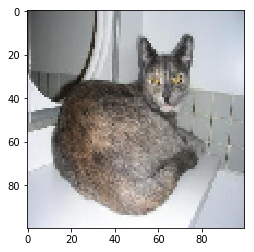

In [98]:
filename = "C:/Users/Gaurav/Gaurav's Files/Study/Data Science/ISB Business Analytics/CBA10/Classes/Capstone/Model/Test/30.jpg"
original = load_img(filename, target_size=(100, 100))
plt.imshow(original)
plt.show()

In [99]:
CATEGORIES = ["Dog", "Cat"]
def prepare(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("CNN CatDog")
predictions = model.predict([prepare(filename)])
print(CATEGORIES[int(predictions[0][0])])

Cat
